In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt


In [5]:
data_true=pd.read_csv("/content/drive/MyDrive/panda_dataset/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/panda_dataset/Fake.csv")

In [6]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
data_true.shape,data_fake.shape

((21417, 4), (23481, 4))

In [9]:
data_true['class']=1
data_fake['class']=0

In [10]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
  data_true.drop([i],axis=0,inplace=True)

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
  data_fake.drop([i],axis=0,inplace=True)

In [11]:
data_manual_testing = pd.concat([data_true_manual_testing,data_fake_manual_testing],axis=0)
data_manual_testing.to_csv("manual_testing.csv")

In [12]:
data_merge = pd.concat([data_true,data_fake],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


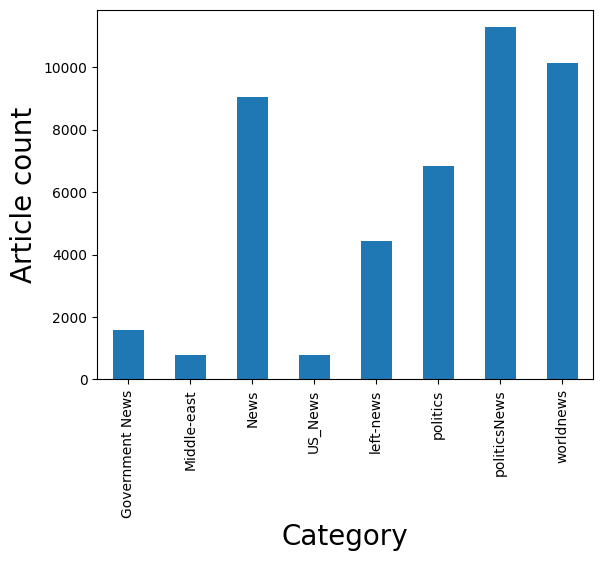

In [13]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind='bar')
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0= Fake news
1= True news


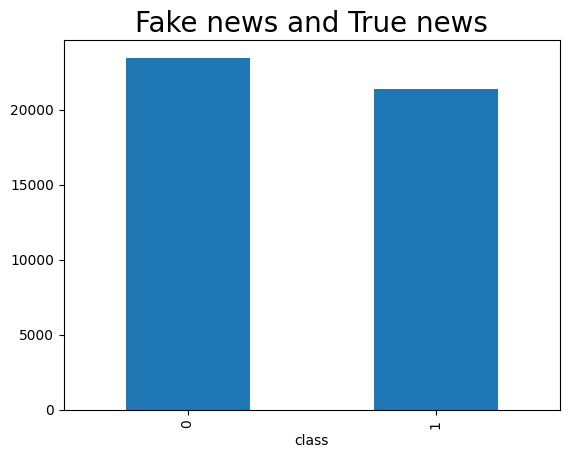

In [14]:
print(data_merge.groupby(['class'])['text'].count())
print("0= Fake news")
print("1= True news")
data_merge.groupby(['class'])['text'].count().plot(kind='bar')
plt.title("Fake news and True news",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


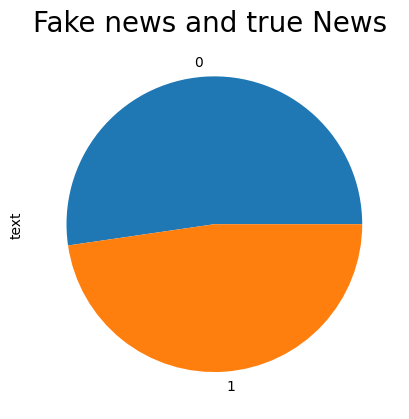

In [15]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title('Fake news and true News ',size=20)
plt.show()

In [16]:
data=data_merge.drop(['title','subject','date'],axis=1)
data.head(10)

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",1
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",1
7,The following statements were posted to the ve...,1
8,The following statements were posted to the ve...,1
9,WASHINGTON (Reuters) - Alabama Secretary of St...,1


In [17]:
data= data.sample(frac=1)
data.head(10)

,text,class
1220,Many of us have been ready to impeach Donald T...,0
17509,WASHINGTON (Reuters) - President Donald Trump ...,1
16495,STRASBOURG/BRUSSELS (Reuters) - EU lawmakers a...,1
6576,HONOLULU (Reuters) - U.S. President Barack Oba...,1
4313,LONDON (Reuters) - British Prime Minister Ther...,1
18989,Watch the hypocrisy in action:,0
5479,The GOP is bowing down to Cliven Bundy and his...,0
13523,ROME (Reuters) - Lebanese Prime Minister Saad ...,1
9007,NEW YORK (Reuters) - The computer technician w...,1
3144,(Reuters) - President Donald Trump has added a...,1


In [18]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [19]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [20]:
data['text']=data['text'].apply(filtering)
data.head(10)

,text,class
1220,many of us have been ready to impeach donald t...,0
17509,washington reuters president donald trump ...,1
16495,strasbourg brussels reuters eu lawmakers a...,1
6576,honolulu reuters u s president barack oba...,1
4313,london reuters british prime minister ther...,1
18989,watch the hypocrisy in action,0
5479,the gop is bowing down to cliven bundy and his...,0
13523,rome reuters lebanese prime minister saad ...,1
9007,new york reuters the computer technician w...,1
3144,reuters president donald trump has added a...,1


In [21]:
x=data['text']
y=data['class']

In [22]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr=LR.predict(xv_test)

LR.score(xv_test, y_test)

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5883
           1       0.98      0.99      0.98      5337

    accuracy                           0.99     11220
   macro avg       0.98      0.99      0.98     11220
weighted avg       0.99      0.99      0.99     11220

